In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

In [112]:
df = pd.read_csv('online_fraud_filtered.csv')
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,15,PAYMENT,"30,804.66",C612559255,"142,171.52","111,366.87",M899145097,0.00,0.00,0
1,15,CASH_OUT,"112,856.08",C496628378,0.00,0.00,C1281898359,"5,150,483.07","5,339,166.03",0


1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [113]:
df.shape

(22091, 10)

In [114]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [115]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True
    )
)

    columns           min value    max value
--  --------------  -----------  -----------
 0  amount                 2.96     1e+07
 1  oldbalanceOrg          0        3e+07
 2  newbalanceOrig         0        3e+07
 3  oldbalanceDest         0        3.43e+07
 4  isFraud                0        1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22091 entries, 0 to 22090
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            22091 non-null  int64  
 1   type            22091 non-null  object 
 2   amount          22091 non-null  float64
 3   nameOrig        22091 non-null  object 
 4   oldbalanceOrg   22091 non-null  float64
 5   newbalanceOrig  22091 non-null  float64
 6   nameDest        22091 non-null  object 
 7   oldbalanceDest  22091 non-null  float64
 8   newbalanceDest  22091 non-null  float64
 9   isFraud         22091 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.7+ MB


In [117]:
df.duplicated().sum()

0

In [118]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

df['type'] = df['type'].astype('category')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,15,PAYMENT,"30,804.66",C612559255,"142,171.52","111,366.87",M899145097,0.00,0.00,0
1,15,CASH_OUT,"112,856.08",C496628378,0.00,0.00,C1281898359,"5,150,483.07","5,339,166.03",0
2,45,TRANSFER,"55,618.00",C954164767,"466,093.00","410,475.00",C26246759,"1,343,088.09","1,398,706.09",0
3,44,CASH_IN,"223,833.68",C998641961,"5,179,503.05","5,403,336.73",C319360735,"227,780.12","3,946.45",0
4,64,CASH_OUT,"3,097,121.75",C1563094045,"3,097,121.75",0.00,C1677375515,0.00,"3,097,121.75",1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22091 entries, 0 to 22090
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   step            22091 non-null  uint8   
 1   type            22091 non-null  category
 2   amount          22091 non-null  float64 
 3   nameOrig        22091 non-null  object  
 4   oldbalanceOrg   22091 non-null  float64 
 5   newbalanceOrig  22091 non-null  float64 
 6   nameDest        22091 non-null  object  
 7   oldbalanceDest  22091 non-null  float64 
 8   newbalanceDest  22091 non-null  float64 
 9   isFraud         22091 non-null  uint8   
dtypes: category(1), float64(5), object(2), uint8(2)
memory usage: 1.2+ MB


In [120]:
df['step'].value_counts()

step
18    1044
19     985
43     922
15     899
17     861
      ... 
87       6
76       4
54       4
29       4
28       4
Name: count, Length: 95, dtype: int64

In [121]:
fraud_sum = df['isFraud'].value_counts()
fraud_sum

isFraud
0    20949
1     1142
Name: count, dtype: int64

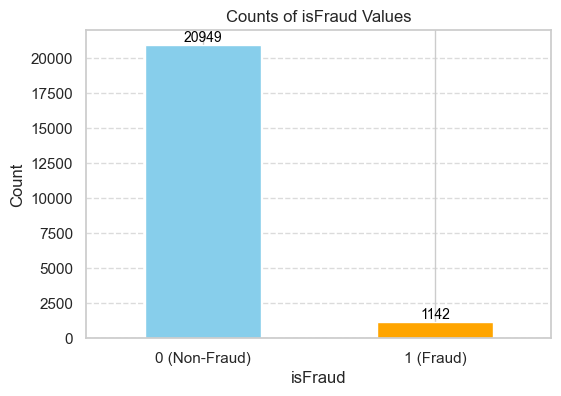

In [122]:
# Plotting
plt.figure(figsize=(6, 4))
bars = fraud_sum.plot(kind='bar', color=['skyblue', 'orange'])

# Adding the count values on top of the bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (top of bar)
        f'{int(bar.get_height())}',  # Text to display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Text color
    )

# Adding labels, title, and grid
plt.title('Counts of isFraud Values')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0 (Non-Fraud)', '1 (Fraud)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [123]:
fraud_counts = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
fraud_counts

C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\1528659417.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



isFraud,0,1
type,,
CASH_IN,4490,0
CASH_OUT,7501,578
DEBIT,120,0
PAYMENT,7142,0
TRANSFER,1696,564


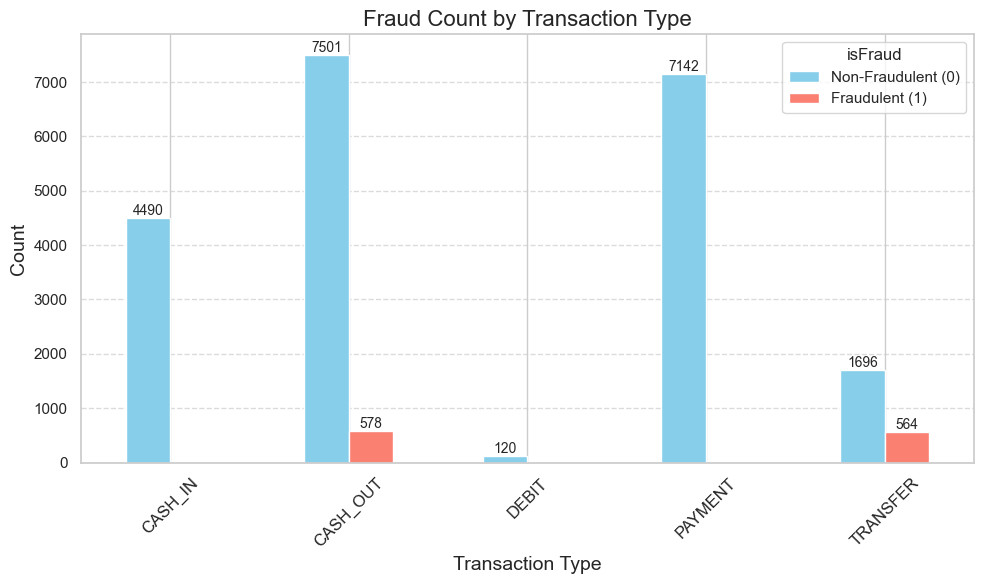

In [124]:
# Plotting
ax = fraud_counts.plot(
    kind='bar', 
    stacked=False, 
    figsize=(10, 6), 
    color=['skyblue', 'salmon']
)

# Adding the values on top of the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only add labels to bars with positive height
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
                height,  # Y position (top of bar)
                f'{int(height)}',  # Text to display
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=10  # Font size
            )

# Customizing the plot
plt.title('Fraud Count by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='isFraud', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\1392910910.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



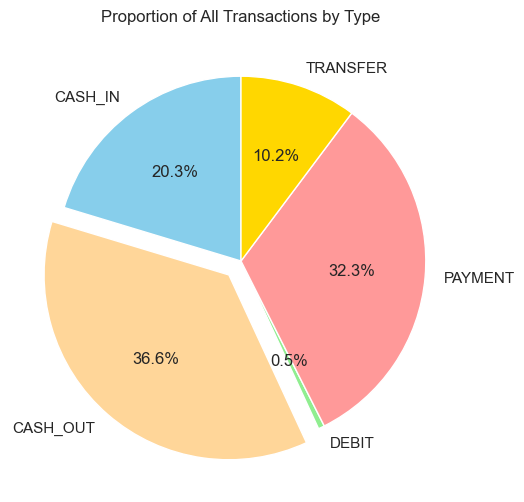

In [125]:
light_orange = '#ffd699'
light_red = '#ff9999'

all_counts_by_type = df.groupby("type").size()
plt.figure(figsize=(6,6))
plt.pie(all_counts_by_type, labels=all_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', light_orange, 'lightgreen', light_red, 'gold'], explode=(0, 0.1, 0, 0, 0))
plt.title('Proportion of All Transactions by Type')
plt.show()

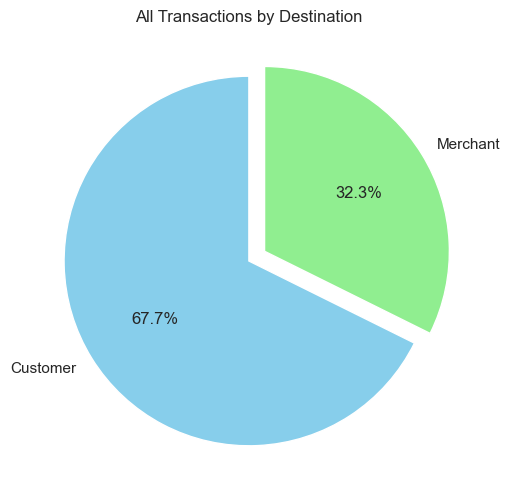

In [126]:
df_copy = df.copy()
df_copy['nameDest_first_letter'] = df_copy['nameDest'].str[0]
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('C', 'Customer')
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('M', 'Merchant')
all_by_dest = df_copy.groupby('nameDest_first_letter').size()

plt.figure(figsize=(6, 6))
plt.pie(all_by_dest, labels=all_by_dest.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], explode=(0, 0.1))
plt.title('All Transactions by Destination')
plt.show()

In [127]:
fraud_count = df[df["isFraud"] == 1].shape[0]
non_fraud_count = df[df["isFraud"] == 0].shape[0]

print(f"Count of Fraud Transactions: {f'{fraud_count:,.0f}'}")
print(f"Count of Non-fraud Transactions: {f'{non_fraud_count:,.0f}'}")

Count of Fraud Transactions: 1,142
Count of Non-fraud Transactions: 20,949


In [128]:
total_transactions = fraud_count + non_fraud_count

fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

print(f"Fraud Transactions percentage: {fraud_percentage:.2f}%")
print(f"Non-fraud Transactions percentage: {non_fraud_percentage:.2f}%")

Fraud Transactions percentage: 5.17%
Non-fraud Transactions percentage: 94.83%


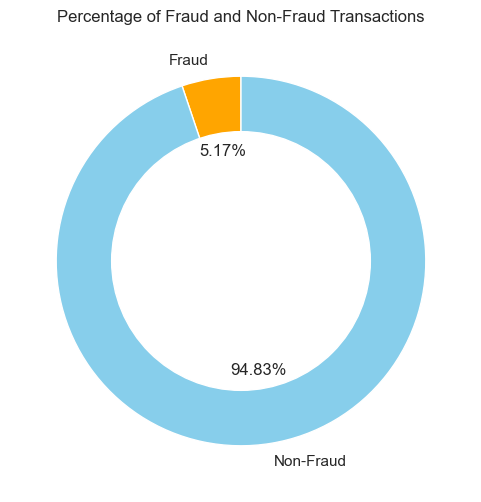

In [129]:
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['orange', 'skyblue']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
dtype: int64


C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\506086615.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



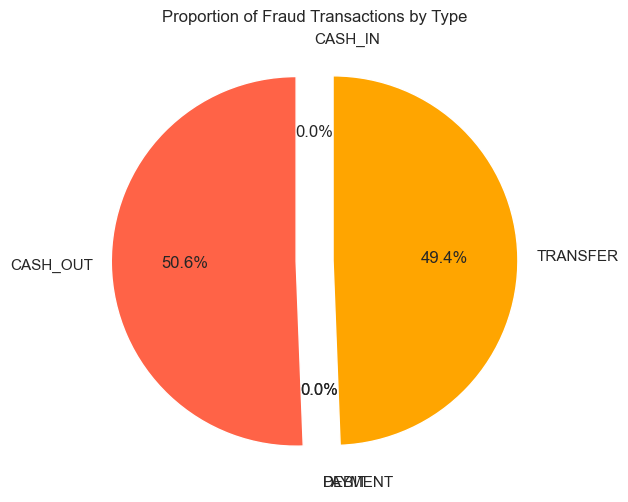

In [130]:
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

explode = [0.1] * len(fraud_counts_by_type)  # This will explode all slices slightly

# Set colors for the pie chart
light_orange = '#FFA500'  # Example color
light_red = '#FF6347'     # Example color
colors = [light_orange, light_red] * (len(fraud_counts_by_type) // 2 + 1)  # Ensure enough colors

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts_by_type, 
        labels=fraud_counts_by_type.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors[:len(fraud_counts_by_type)], 
        explode=explode)
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\2203718920.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



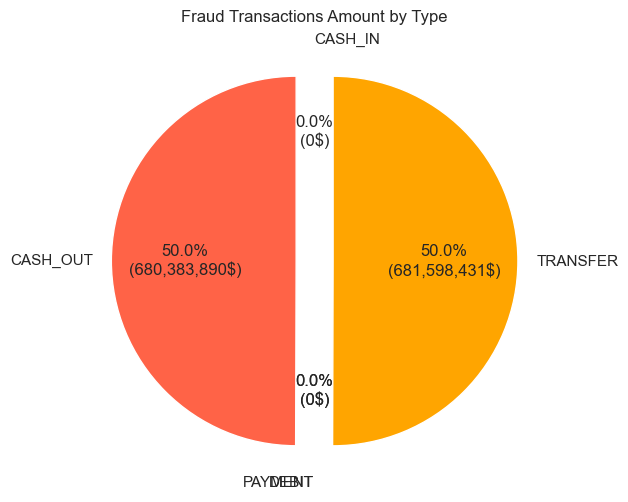

In [131]:
fraud_amounts_by_type = df[df["isFraud"] == 1].groupby("type")["amount"].sum()
explode = [0.1] * len(fraud_amounts_by_type)  # This will explode all slices slightly

# Set colors for the pie chart
light_orange = '#FFA500'  # Example color
light_red = '#FF6347'     # Example color
colors = [light_orange, light_red] * (len(fraud_amounts_by_type) // 2 + 1)  # Ensure enough colors

plt.figure(figsize=(6, 6))
plt.pie(fraud_amounts_by_type, 
        labels=fraud_amounts_by_type.index, 
        autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', 
        startangle=90, 
        colors=colors[:len(fraud_amounts_by_type)], 
        explode=explode)
plt.title('Fraud Transactions Amount by Type')
plt.show()

In [132]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,15,PAYMENT,"30,804.66",C612559255,"142,171.52","111,366.87",M899145097,0.00,0.00,0
1,15,CASH_OUT,"112,856.08",C496628378,0.00,0.00,C1281898359,"5,150,483.07","5,339,166.03",0
2,45,TRANSFER,"55,618.00",C954164767,"466,093.00","410,475.00",C26246759,"1,343,088.09","1,398,706.09",0


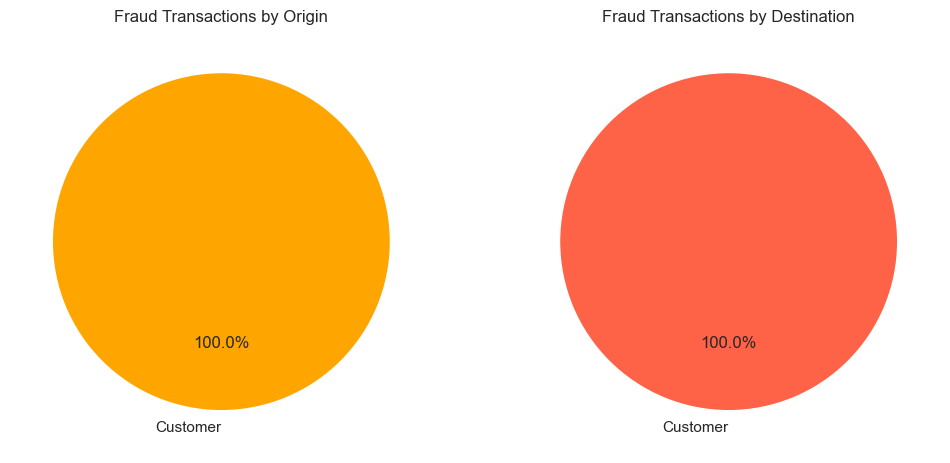

In [133]:
fraud_transactions = df[df['isFraud'] == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index, autopct='%1.1f%%', startangle=90, colors=[light_orange])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index, autopct='%1.1f%%', startangle=90, colors=[light_red])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

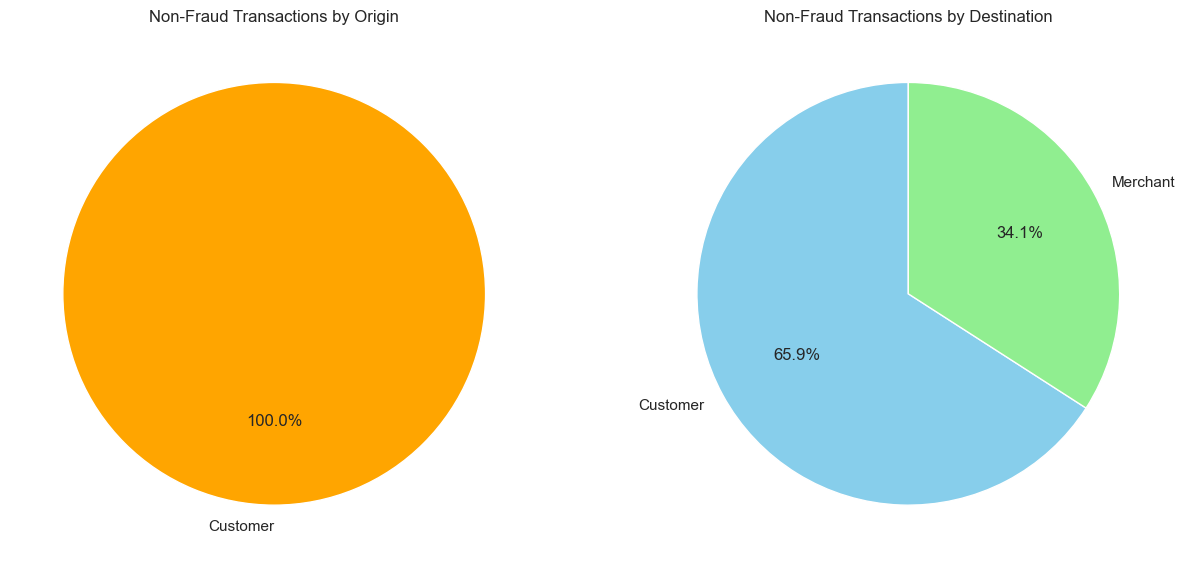

In [134]:
non_fraud_transactions = df[df['isFraud'] == 0].copy()
non_fraud_transactions['nameOrg_first_letter'] = non_fraud_transactions['nameOrig'].str[0]
non_fraud_transactions['nameDest_first_letter'] = non_fraud_transactions['nameDest'].str[0]
non_fraud_transactions['nameOrg_first_letter'] = non_fraud_transactions['nameOrg_first_letter'].replace({'C': 'Customer', 'M': 'Merchant'})
non_fraud_transactions['nameDest_first_letter'] = non_fraud_transactions['nameDest_first_letter'].replace({'C': 'Customer', 'M': 'Merchant'})

non_fraud_by_name_orig_first_letter = non_fraud_transactions.groupby('nameOrg_first_letter').size()
non_fraud_by_name_dest_first_letter = non_fraud_transactions.groupby('nameDest_first_letter').size()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Pie chart for Non-Fraud Transactions by Origin
axes[0].pie(non_fraud_by_name_orig_first_letter, labels=non_fraud_by_name_orig_first_letter.index, autopct='%1.1f%%', startangle=90, colors=[light_orange, 'lightcoral'])
axes[0].set_title('Non-Fraud Transactions by Origin')

# Pie chart for Non-Fraud Transactions by Destination
axes[1].pie(non_fraud_by_name_dest_first_letter, labels=non_fraud_by_name_dest_first_letter.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Non-Fraud Transactions by Destination')

plt.show()

In [135]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics on the amounts for non-fraud transactions:\n", pd.DataFrame.describe(df[df["isFraud"] == 0].amount), "\n")
print("Statistics on the amounts for fraud transactions:\n", pd.DataFrame.describe(df[df["isFraud"] == 1].amount), "\n")

Statistics on the amounts for non-fraud transactions:
 count      20,949.00
mean      155,241.36
std       245,384.83
min             2.96
25%        12,116.57
50%        74,577.74
75%       211,582.93
max     3,752,027.92
Name: amount, dtype: float64 

Statistics on the amounts for fraud transactions:
 count        1,142.00
mean     1,192,628.93
std      2,030,598.96
min            119.00
25%         86,070.17
50%        353,179.45
75%      1,248,759.00
max     10,000,000.00
Name: amount, dtype: float64 



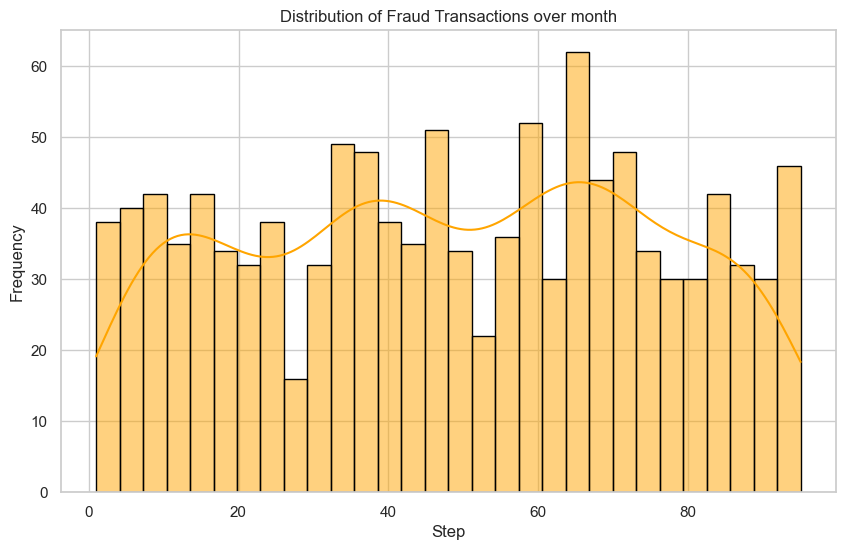

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions["step"], bins=30, kde=True, color=light_orange, edgecolor='black')
plt.title('Distribution of Fraud Transactions over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

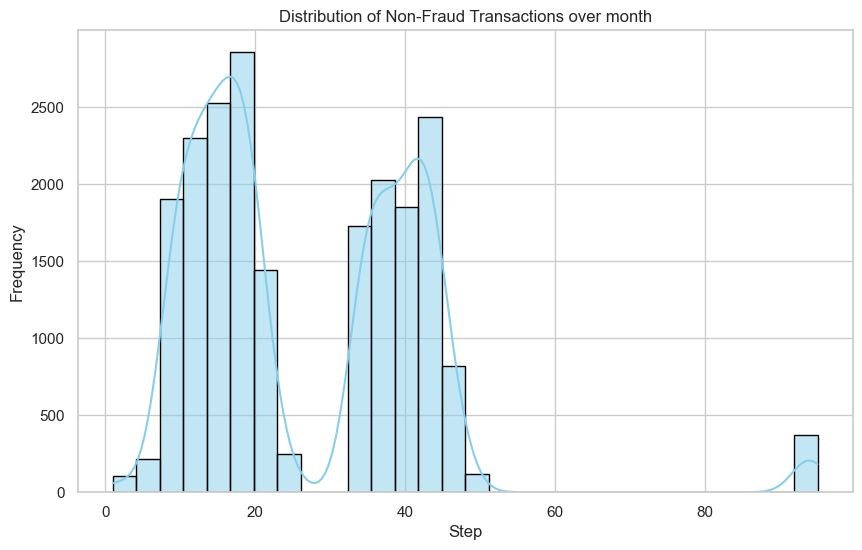

In [137]:
non_fraud_transactions = df[df["isFraud"] == 0]
plt.figure(figsize=(10, 6))
sns.histplot(non_fraud_transactions["step"], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Non-Fraud Transactions over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

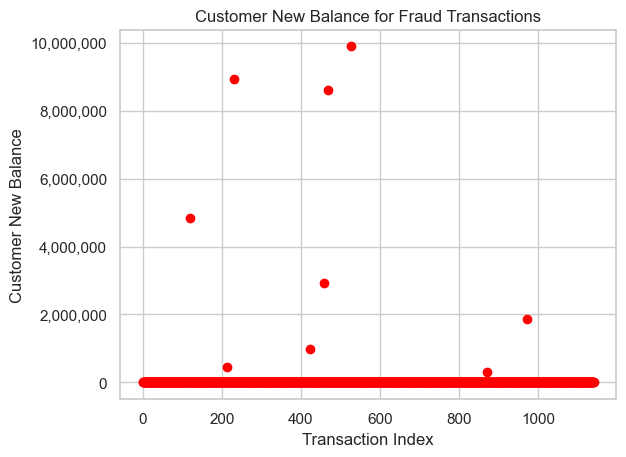

In [138]:
from matplotlib.ticker import FuncFormatter
plt.scatter(range(len(fraud_transactions)), fraud_transactions['newbalanceOrig'], color='red')
plt.title('Customer New Balance for Fraud Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Customer New Balance')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{value:,.0f}'))

plt.show()

C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\1891498494.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

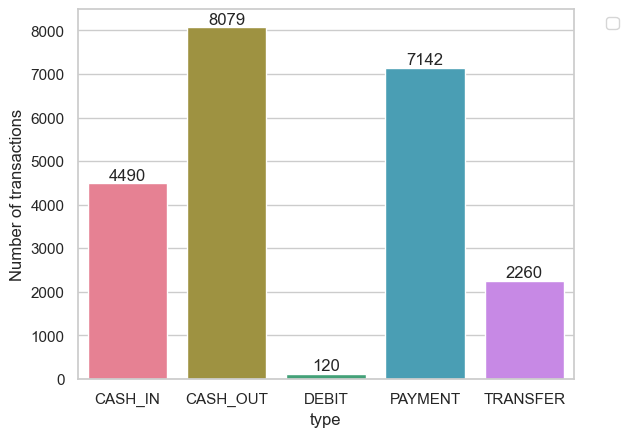

In [139]:
ax = sns.countplot(x='type', data=df, palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

1. CASH_OUT and PAYMENT have the highest number of transactions.
2. DEBIT transactions are the least frequent.
3. CASH_IN and TRANSFER have moderate transaction counts.

In [140]:
df['nameOrig'].value_counts()

nameOrig
C612559255     1
C1687438859    1
C1552755071    1
C1444650613    1
C606564447     1
              ..
C430586727     1
C106119091     1
C1106393274    1
C1335660020    1
C1112914860    1
Name: count, Length: 22091, dtype: int64

There are 6,353,307 unique customers (nameOrig). The counts represent the number of transactions per customer, with each customer making at least one transaction.


Text(0.5, 1.0, 'Distribution of oldbalanceOrg')

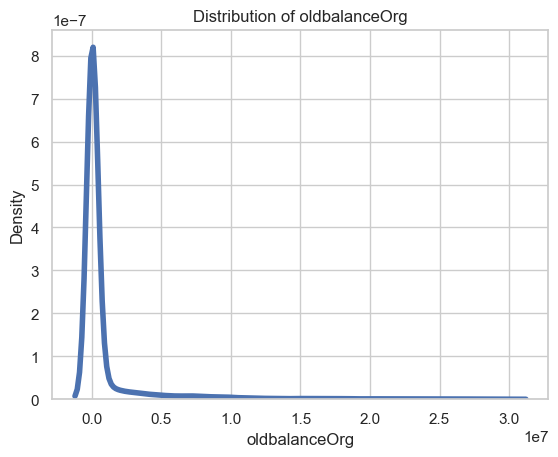

In [141]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of oldbalanceOrg')

1. Distribution of oldbalanceOrg: The plot shows the density distribution of the original balance before transactions (oldbalanceOrg).
2. Skewed Distribution: The distribution is highly skewed to the right, indicating that most customers have a low original balance before transactions.
3. Density Peak: There is a significant peak at the very low balance values, suggesting that a large number of customers have a near-zero balance before making transactions.
4. Sparse High Values: The density quickly drops to near zero as the balance increases, indicating that very few customers have high balances.

The majority of customers have low balances before transactions, with very few having high balances. This suggests a strong concentration of low-value accounts in the dataset.

Text(0.5, 1.0, 'Distribution of newbalanceOrig')

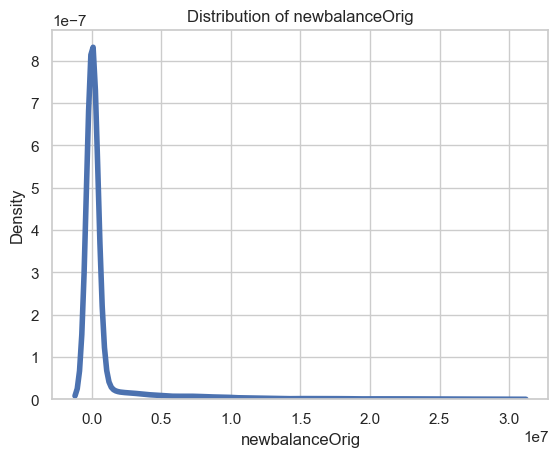

In [142]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of newbalanceOrig')

1. Mostly Low Balances: Most transactions leave the account with a very low balance close to zero.
2. Fewer High Balances: As the balance increases, the number of transactions decreases quickly.
3. Rare High Balances: A small number of transactions leave the account with a very high balance (up to 50 million).
4. Skewed Data: The data shows that low balances are very common, while high balances are rare.
This means most accounts are almost empty after transactions, but occasionally, some have a lot of money left, which might need further checking for unusual activity.

Text(0.5, 1.0, 'Distribution of oldbalanceDest')

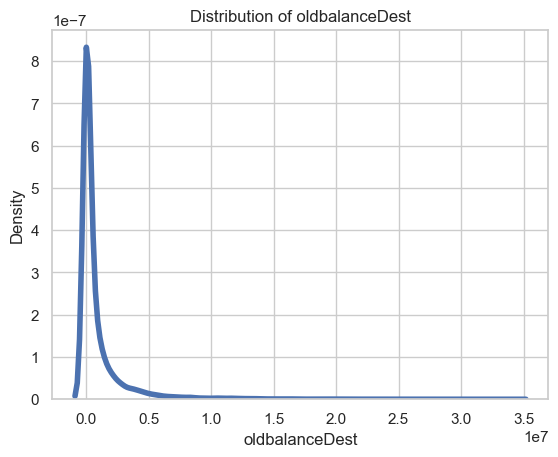

In [143]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of oldbalanceDest')

1. Mostly Low Balances: Most destination accounts have very low balances before transactions.
2. Few High Balances: Accounts with higher balances are much less common.
3. Rare Very High Balances: Some accounts have very high balances (up to 350 million), but this is rare.
4. Skewed Data: Most accounts start with little money, while a few have a lot.

This means most destination accounts have less money before receiving transactions, but sometimes they have a lot.

Text(0.5, 1.0, 'Distribution of newbalanceDest')

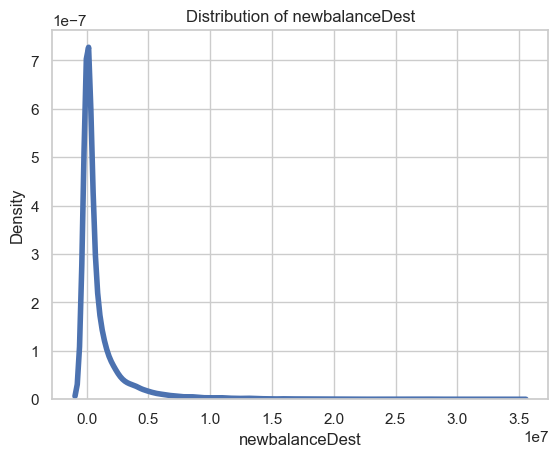

In [144]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of newbalanceDest')

1. Skewness: The distribution is highly skewed to the right, indicating that most transactions result in a new balance close to zero for the recipient.
2. Density Peak: There is a sharp peak at the very low end of the newbalanceDest values, suggesting that many recipients have either no balance or a very small balance after the transaction.
3. Rare High Values: There are very few instances where the newbalanceDest is very high, as seen by the long tail extending to the right.

This suggests that most transactions do not significantly increase the balance of the recipient account, but a few transactions result in very high recipient balances. 

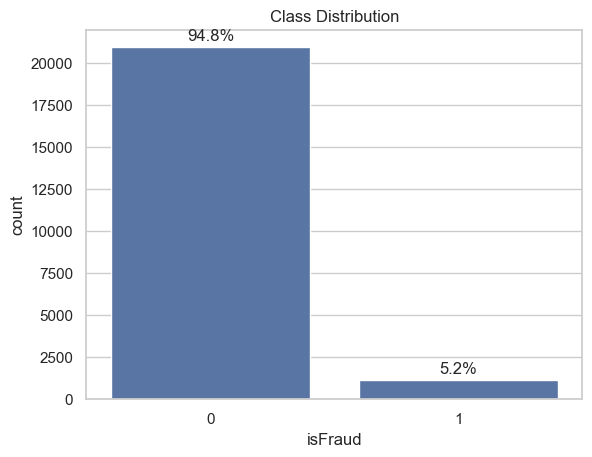

In [145]:
# Plot the class distribution
ax = sns.countplot(x='isFraud', data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='baseline', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.title('Class Distribution')
plt.show()

C:\Users\ganes\AppData\Local\Temp\ipykernel_8800\3521969085.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



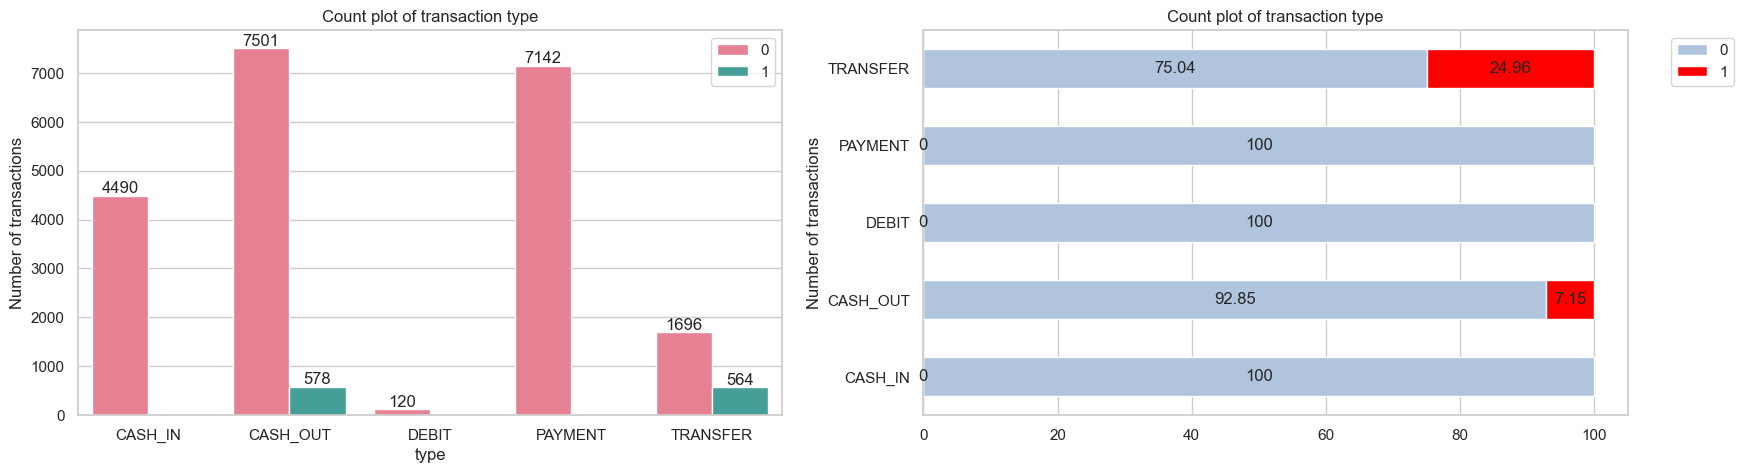

In [146]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='husl', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'red'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

### Left Plot: Count of Transaction Types:

This bar plot shows the total number of each transaction type (CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER) and highlights how many of these transactions are fraudulent (isFraud = 1) and non-fraudulent (isFraud = 0).

Observations:
1. CASH_OUT and PAYMENT are the most common transaction types.
2. Fraudulent transactions are significantly fewer in number compared to non-fraudulent transactions across all types.
3. TRANSFER and CASH_OUT have visible counts of fraudulent transactions, unlike other types which show minimal or no fraudulent transactions.

### Right Plot: Percentage of Transaction Types:

This horizontal bar plot shows the percentage distribution of fraudulent and non-fraudulent transactions for each transaction type.

Observations:
1. TRANSFER and CASH_OUT have the highest percentage of fraudulent transactions (0.77% and 0.18% respectively).
2. Other transaction types like PAYMENT, DEBIT, and CASH_IN have 0% fraudulent transactions.
3. The vast majority of transactions in all categories are non-fraudulent.
### Key Insights:
Fraudulent transactions are a small fraction of the total transactions.
TRANSFER and CASH_OUT types are more prone to fraud compared to other transaction types.

Text(0, 0.5, 'Number of transactions')

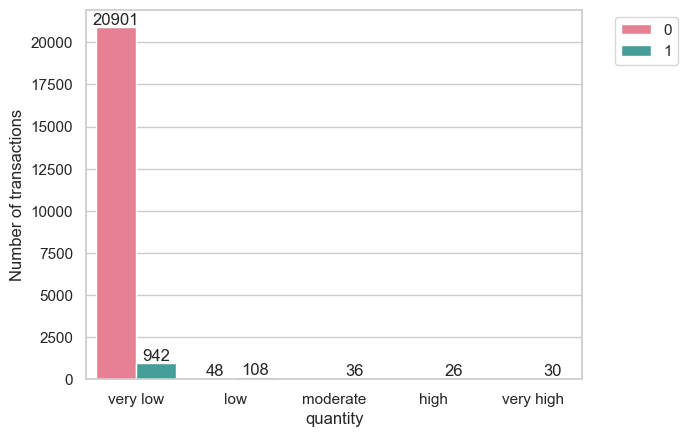

In [147]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

The plot shows that:

1. Most transactions are in the very low category.
2. Fraudulent transactions are primarily in the very low and low categories.
3. Non-fraudulent transactions dominate all categories.

Key Insight:

Fraud is more likely to occur in smaller transaction amounts.

Text(0.5, 0, 'pre-transaction balance amount')

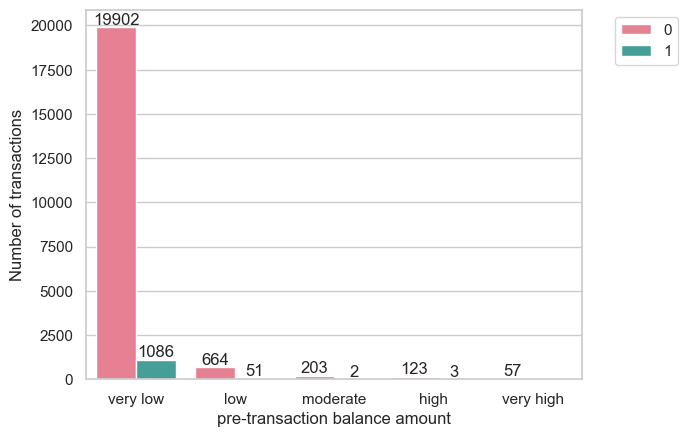

In [148]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('pre-transaction balance amount')

1. Majority of Transactions: Most transactions occur in the 'very low' balance category.
2. Fraudulent Transactions: Present across all categories but less frequent compared to non-fraudulent transactions.
3. Fraud Distribution: No strong dependency on the balance amount; fraud occurs in all categories but in smaller numbers.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

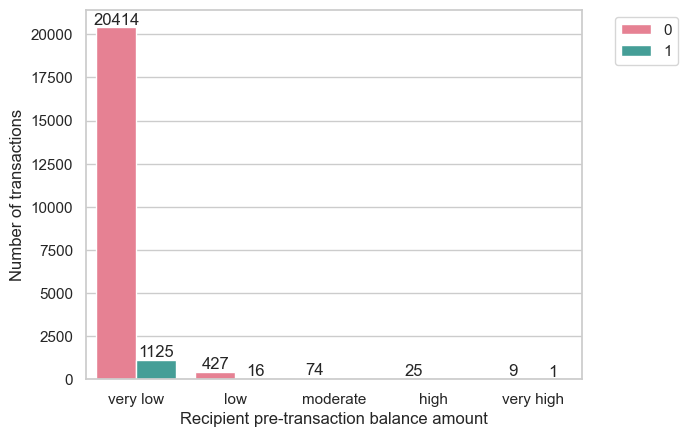

In [149]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

1. Majority of Transactions: Most transactions occur in the 'very low' balance category.
2. Fraudulent Transactions: Present across all categories but less frequent compared to non-fraudulent transactions.
3. Fraud Distribution: No strong dependency on the recipient's pre-transaction balance amount; fraud occurs in all categories but in smaller numbers.

In [150]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,15,0,"30,804.66",C612559255,"142,171.52","111,366.87",M899145097,0.00,0.00,0,very low,very low,very low
1,15,3,"112,856.08",C496628378,0.00,0.00,C1281898359,"5,150,483.07","5,339,166.03",0,very low,very low,very low
2,45,4,"55,618.00",C954164767,"466,093.00","410,475.00",C26246759,"1,343,088.09","1,398,706.09",0,very low,very low,very low
3,44,1,"223,833.68",C998641961,"5,179,503.05","5,403,336.73",C319360735,"227,780.12","3,946.45",0,very low,very low,very low
4,64,3,"3,097,121.75",C1563094045,"3,097,121.75",0.00,C1677375515,0.00,"3,097,121.75",1,low,very low,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22086,20,1,"54,946.48",C1291842801,"30,907.00","85,853.48",C306688950,"129,811.31","134,061.33",0,very low,very low,very low
22087,47,3,"199,525.97",C1753525919,"72,035.00",0.00,C1192518350,"44,681.04","244,207.01",0,very low,very low,very low
22088,16,1,"154,252.94",C2020546830,"694,271.34","848,524.28",C1429167598,"1,734,445.82","2,193,348.36",0,very low,very low,very low
22089,7,4,"441,445.58",C1023505879,"441,445.58",0.00,C847761155,0.00,0.00,1,very low,very low,very low


In [151]:
numericalCol = ['step','type','amount','oldbalanceOrg','newbalanceOrig',
                'oldbalanceDest','newbalanceDest','isFraud']
catCol = ['nameOrig','nameDest']

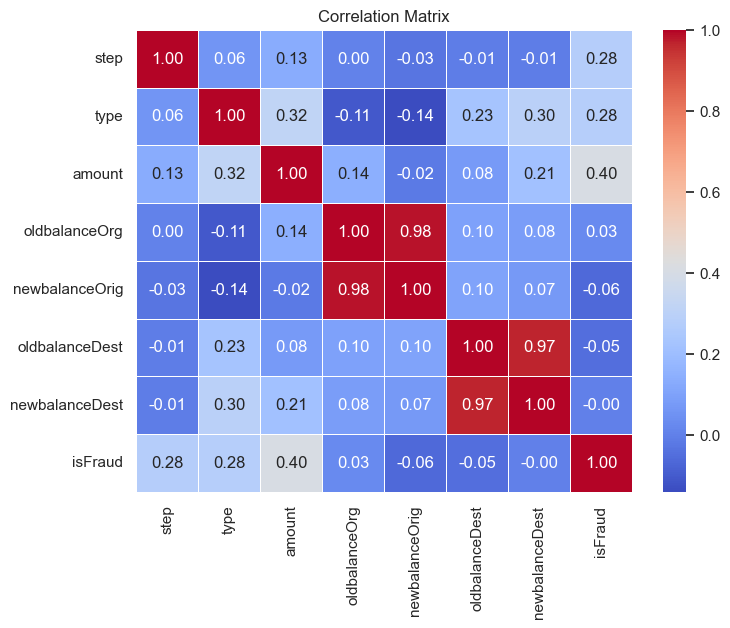

In [152]:
correlation_matrix = df[numericalCol].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Explanation of the Correlation Matrix Image:
Diagonal Values:

1. Each variable is perfectly correlated with itself, shown by the values of 1.00 along the diagonal.

Strong Correlations:

1. oldbalanceOrg and newbalanceOrg: Notice the dark red color and the value of 1.00, indicating that the balance before and after the transaction for the origin account are perfectly correlated.
2. oldbalanceDest and newbalanceDest: Similar strong correlation shown with a value of 0.98, meaning the recipient's balance changes in a highly 
predictable manner.

Moderate Correlations:

1. amount and newbalanceDest: Highlighted by a lighter shade of red and a value of 0.46, indicating that larger transaction amounts tend to increase the recipient's new balance.
2. type and amount: Notice the value of 0.27, suggesting some transaction types are associated with higher amounts.

Weak to No Correlations:

1. isFraud: Observe the near-zero correlations with most other variables, shown by the blue colors and low values like 0.08 (with amount) and 0.01 (with oldbalanceOrg), indicating that fraud is not strongly related to any single numerical feature in the dataset.
2. isFlaggedFraud: Very low correlations across the board, demonstrated by the blue colors and values close to zero, suggesting flagged fraud cases do not correlate strongly with these variables.

General Observations:

1. Most off-diagonal values are close to zero (blue areas), showing low correlation among many variables, indicating that they behave independently.

By analyzing this image, we can conclude that while certain balances are highly interrelated, fraud detection requires more than just these numerical variables. The moderate correlations between transaction amounts and balances are insightful for financial analysis but do not single-handedly indicate fraud.

In [153]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [154]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

df = df.copy()

# Frequency encoding for categorical variables
df['nameOrig'] = df['nameOrig'].map(df['nameOrig'].value_counts())
df['nameDest'] = df['nameDest'].map(df['nameDest'].value_counts())

# Define columns to keep as features and the target variable
features = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

X = df[features]
y = df[target]

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Standardize the data
    sc = StandardScaler()
    scaled_train = sc.fit_transform(X_train)
    scaled_test = sc.transform(X_test)
    X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)

    # Handle class imbalance
    rus = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
    X_train, y_train = rus.fit_resample(X_train, y_train)

    # Check shapes
    print("X_train shape after resampling:", X_train.shape)
    print("y_train shape after resampling:", y_train.shape)

X_train shape after resampling: (1826, 9)
y_train shape after resampling: (1826,)
X_train shape after resampling: (1828, 9)
y_train shape after resampling: (1828,)
X_train shape after resampling: (1828, 9)
y_train shape after resampling: (1828,)
X_train shape after resampling: (1828, 9)
y_train shape after resampling: (1828,)
X_train shape after resampling: (1826, 9)
y_train shape after resampling: (1826,)


In [155]:
scaled_train.shape

(17673, 9)

In [156]:
scaled_test.shape

(4418, 9)

In [157]:
def model_comparison_evaluate(classifiers, X, y, skfold):
    print('K-Fold Cross-Validation:\n')
    
    for name, model in classifiers.items():
        print(f'{name}:')
        
        # Get cross-validated predictions
        y_pred_prob = cross_val_predict(model, X, y, cv=skfold, n_jobs=-1, method='predict_proba')[:, 1]
        print("Shape of y_pred_prob: ", y_pred_prob.shape)
        
        # Ensure y_pred is a proper binary array (0 or 1)
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Calculate and print various metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        
        print(f'Accuracy: {accuracy:.3f}')
        print(f'Precision: {precision:.3f}')
        print(f'Recall: {recall:.3f}')
        print(f'F1 Score: {f1:.3f}')
        
        # Print classification report
        print('Classification Report:')
        print(classification_report(y, y_pred))
        
        # Plot confusion matrix using Plotly
        cm = confusion_matrix(y, y_pred)

        # Extract unique labels dynamically from `y`
        labels = sorted(np.unique(y))

        # Prepare annotations
        z_text = [[str(cell) for cell in row] for row in cm]

        # Create annotated heatmap
        fig_cm = ff.create_annotated_heatmap(
            z=cm,
            x=labels,
            y=labels,
            annotation_text=z_text,
            colorscale='Blues'
        )

        # Update layout for heatmap
        fig_cm.update_layout(
            title_text=f'Confusion Matrix for {name}',
            xaxis=dict(title='Predicted', showgrid=False),
            yaxis=dict(title='Actual', showgrid=False),
            width=600,
            height=600
        )
        fig_cm.show()

        # Plot ROC Curve and Calculate Best Threshold
        fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
        youden_j = tpr - fpr

        # Find the index of the maximum J statistic
        best_index = youden_j.argmax()

        # Best threshold
        best_threshold = thresholds[best_index]

        print(f"Best Threshold: {best_threshold}")
        print(f"True Positive Rate at Best Threshold: {tpr[best_index]:.3f}")
        print(f"False Positive Rate at Best Threshold: {fpr[best_index]:.3f}")
        
        # Calculate AUC
        roc_auc = auc(fpr, tpr)

        # Plot ROC Curve using Plotly
        fig_roc = go.Figure()

        fig_roc.add_trace(go.Scatter(
            x=fpr, y=tpr, mode='lines',
            name=f'ROC curve (area = {roc_auc:.2f})',
            line=dict(color='blue', width=2)
        ))
        fig_roc.add_trace(go.Scatter(
            x=[0, 1], y=[0, 1], mode='lines',
            name='Random Guess',
            line=dict(color='gray', width=2, dash='dash')
        ))

        fig_roc.update_layout(
            title=f'ROC Curve - {name}',
            xaxis=dict(title='False Positive Rate'),
            yaxis=dict(title='True Positive Rate'),
            showlegend=True,
            width=800,
            height=600
        )
        fig_roc.show()

        print('\n')


In [ ]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=seed),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}


model_comparison_evaluate(classifiers, X_train, y_train, skfold)


K-Fold Cross-Validation:

Random Forest Classifier:
Shape of y_pred_prob:  (1826,)
Accuracy: 0.976
Precision: 0.977
Recall: 0.975
F1 Score: 0.976
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       913
           1       0.98      0.97      0.98       913

    accuracy                           0.98      1826
   macro avg       0.98      0.98      0.98      1826
weighted avg       0.98      0.98      0.98      1826



Best Threshold: 0.48
True Positive Rate at Best Threshold: 0.977
False Positive Rate at Best Threshold: 0.024




Logistic Regression:
Shape of y_pred_prob:  (1826,)
Accuracy: 0.865
Precision: 0.855
Recall: 0.880
F1 Score: 0.867
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       913
           1       0.86      0.88      0.87       913

    accuracy                           0.87      1826
   macro avg       0.87      0.87      0.87      1826
weighted avg       0.87      0.87      0.87      1826



Best Threshold: 0.6039521774031629
True Positive Rate at Best Threshold: 0.826
False Positive Rate at Best Threshold: 0.068




K-Nearest Neighbors:
Shape of y_pred_prob:  (1826,)
Accuracy: 0.909
Precision: 0.922
Recall: 0.894
F1 Score: 0.908
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       913
           1       0.92      0.89      0.91       913

    accuracy                           0.91      1826
   macro avg       0.91      0.91      0.91      1826
weighted avg       0.91      0.91      0.91      1826



Best Threshold: 0.6
True Positive Rate at Best Threshold: 0.894
False Positive Rate at Best Threshold: 0.076


In [159]:
model_metrics = []

# Iterate through classifiers and evaluate each one
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data (assuming X_test, y_test are available)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results in a dictionary
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(model_metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.97,0.63,0.98,0.77
1,Logistic Regression,0.86,0.26,0.88,0.40
2,K-Nearest Neighbors,0.91,0.35,0.89,0.51


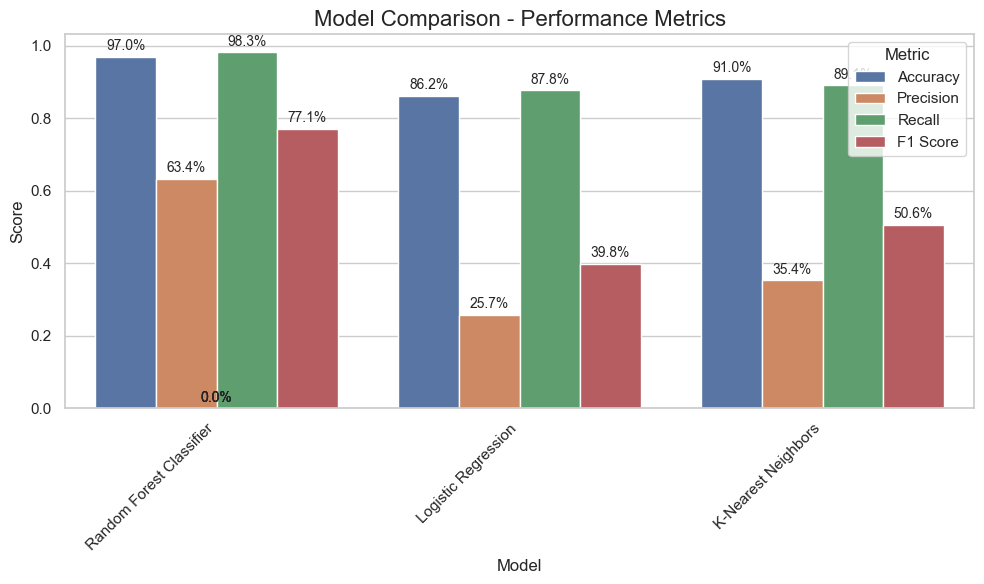

In [160]:
sns.set(style="whitegrid")

# Reshape the DataFrame for easier plotting
metrics_df_melted = metrics_df.melt(id_vars='Model', 
                                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                    var_name='Metric', value_name='Score')

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=metrics_df_melted, x='Model', y='Score', hue='Metric')

# Add annotations with percentages
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_height() + 0.01  # Position the text slightly above the bar
    ax.annotate(f'{height*100:.1f}%', (x, y), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Model Comparison - Performance Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()